In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import re
import matplotlib.pyplot as plt

In [2]:
#List of years with alumni on Harvard MD-PHD website
year_list = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
#Creating a year range to loop through
year_range = range(0, len(year_list))

#Creating a dictionary that will be used to store the key-value pairs for the colleges and their occurances in the data
college_count = {}

#Function used to clean the data scraped from the Harvard MDPHD alumni website
def clean_alum_to_list(alum):
    alum_clean = alum.replace('</strong>','')
    alum_clean = alum_clean.replace('\r', '')
    alum_clean = alum_clean.replace('\n', '')
    alum_clean = alum_clean.replace('\t', '')
    
    alum_list = re.split('<br/>?', alum_clean)
    alum_details = []
    for rr in alum_list:
            rr1 = rr.strip()
            if (len(rr1) > 1):
                rr1 = re.sub('<[/pem]*>', '', rr1)
                alum_details.append(rr1)

    return alum_details

#Looping through each year of data from 2010-2020: all the data the harvard MDPHD alumni website contains
for year_num in year_range:
    url = "https://www.hms.harvard.edu/md_phd/alumni/"+str(year_list[year_num])+".html"
    source = requests.get(url)

    #Removing any patterns of strongs that serve no purpose and any em patterns that have no text in them
    dedup_source_content = (source.content).replace(b'</strong><strong>', b'')
    dedup_source_content = dedup_source_content.replace(b'</em><em>', b'')
    
    # Parse using BeautifulSoup
    soup = BeautifulSoup(dedup_source_content, 'html.parser')

    # Break up the <div> tage
    results = soup.findAll('div', class_="content three_quarter")

    alumni = results[0]

    # Since each alum name is bolded using <strong> use that to count number of alum
    

    #Used for checking
    name_list = alumni.findAll('strong')
    numb_alum = len(name_list)

    # Use regular expression to split into strings based on <strong> tag
    # But drop the first one which is just <p> before the first <strong>
    alum_list = re.split("<strong>", str(alumni))[1:]

    # use Assert to make sure number of alums is right
    assert len(alum_list) == numb_alum, "Alumni number do not match"

    #print("Number of alumni in {} is {}".format(year_list[year_num], len(alum_list))) 

    #Creating a list for the alums in a year
    alums_in_year = []
    for alum in alum_list:
        alum_details = clean_alum_to_list(alum)
        alums_in_year.append(alum_details)
        
    #Creating a list for the list of undergraduate colleges
    ug_college = []
    for alum in alums_in_year:
        try:
            college = re.findall("[, a-zA-Z]*[,.]([a-zA-Z �\t\-]*)\([0-9][0-9][0-9][0-9]\)", alum[1])[-1]
        except:
            print("")
            continue
        college = ' '.join(college.split())

        #Inconsistent naming and typos on the website must be changed to be uniform throughout
        if "Duke" in college:
            college = "Duke"
        if "Yale" in college:
            college = "Yale"
        if "Berkley" in college:
            college = "California, Berkeley"
        if "Berkeley" in college:
            college = "California, Berkeley"
        if "Los Angeles" in college:
            college = "California, Los Angeles"
        if "Irvine" in college:
            college = "California, Irvine"
        if "Brown" in college:
            college = "Brown"
        if "San Diego" in college:
            college = "California, San Diego"
        if "Harvard" in college:
            college = "Harvard"
        if "Pennsylvania" in college:
            college = "Pennsylvania"
        if "Stanford" in college:
            college = "Stanford"
        if "Hopkins" in college:
            college = "Johns Hopkins"
        if "Baltimore" in college:
            college = "Maryland"
        if "University of Michigan" in college:
            college = "Michigan"
        if "Puerto Rico" in college:
            college = "University of Puerto Rico"
        if "Massachusetts Institute of Technology" in college:
            college = "MIT"
        if "Princeton" in college:
            college = "Princeton"
        ug_college.append(college)
    for college in ug_college:
        college_count[college] = college_count.get(college, 0) + 1
print(college_count)


{'University of Chicago': 3, 'Princeton': 11, 'University of Wisconsin': 1, 'Harvard': 40, 'California, Berkeley': 1, 'Stanford': 20, 'MIT': 21, 'University of Arizona': 2, 'University of Utah': 1, 'Pennsylvania': 11, 'Duke': 5, 'Washington University': 5, 'California, Los Angeles': 5, 'Michigan': 2, 'Amherst College': 2, 'Columbia University': 5, 'California, Irvine': 1, 'Ripon College': 1, 'Cornell University': 3, 'Yale': 11, 'Johns Hopkins': 5, 'Mississippi State University': 1, 'Georgetown University': 1, 'Swarthmore College': 2, 'Brigham Young University': 1, 'Brandeis University': 1, 'University of Albany': 1, 'Purdue University': 1, 'Williams College': 4, 'Indiana University': 1, 'University of Florida': 1, 'University of Illinois Urbana-Champaign': 1, 'California Institute of Technology': 2, 'Georgia Technical Institute': 2, 'Rice University': 2, 'College of the Holy Cross': 1, 'University of Washington': 2, 'Furman University': 1, 'University of Puerto Rico': 2, 'University o

In [3]:
#Creating a dictionary for the colleges with more than 10 occurances
college_count_over_ten = {}
#Looping through the original college count dict and adding ones with over 10 to the college_count_over_ten dict
for university in college_count:
    if college_count[university] >= 10:
        college_count_over_ten.update({university: college_count[university]})

print(college_count_over_ten)


{'Princeton': 11, 'Harvard': 40, 'Stanford': 20, 'MIT': 21, 'Pennsylvania': 11, 'Yale': 11}


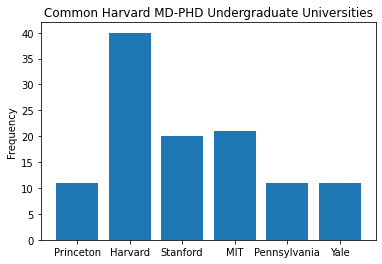

In [4]:
#Creating a bar plot for the college_count_over_ten to be displayed
plt.bar(range(len(college_count_over_ten)), list(college_count_over_ten.values()), align = 'center')
plt.xticks(range(len(college_count_over_ten)), list(college_count_over_ten.keys()))
plt.title("Common Harvard MD-PHD Undergraduate Universities")
plt.ylabel("Frequency")
plt.show()